## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [1]:
import pandas as pd
heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
heart.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       204 non-null    object
 1   age        204 non-null    int64 
 2   sex        204 non-null    int64 
 3   cp         204 non-null    int64 
 4   trtbps     204 non-null    int64 
 5   chol       204 non-null    int64 
 6   restecg    204 non-null    int64 
 7   thalach    204 non-null    int64 
 8   diagnosis  204 non-null    object
dtypes: int64(7), object(2)
memory usage: 14.5+ KB


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [10]:
from sklearn.linear_model import LogisticRegression
heart["target"] = (heart["diagnosis"] == "Disease").astype(int) #binary target

#fit logistic regression using age and chol
X = heart[["age", "chol"]]
y = heart["target"]

log_reg = LogisticRegression()
log_reg.fit(X, y)

#coefs
b0 = log_reg.intercept_[0]
b1, b2 = log_reg.coef_[0]

print(b0, b1, b2)


3.2401122588590714 -0.0468633061303684 -0.001801238519029135


In [11]:
#question 1
chol_50 = -(b0 + b1*55) / b2
print(chol_50)

367.8748897985851


In [12]:
import numpy as np

#question 2
z_90 = np.log(0.9 / 0.1)
chol_90 = (z_90 - b0 - b1*55) / b2
print(chol_90)


-851.9660996782114


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#fit lda
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

#coefs and intercept
w1, w2 = lda.coef_[0]
w0 = lda.intercept_[0]

#answer the question
chol_boundary = -(w0 + w1*55) / w2
print(chol_boundary)

368.23535752993797


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#tune C with grid search
param_grid = {"C": [0.01, 0.1, 1, 10, 50, 100]}

svc = SVC(kernel="linear")

grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X, y)

grid.best_params_


{'C': 0.1}

In [19]:
best_C = grid.best_params_["C"]

svc_model = SVC(kernel="linear", C=best_C)
svc_model.fit(X, y)

#linear decision boundary
w1, w2 = svc_model.coef_[0]
w0 = svc_model.intercept_[0]

#question
chol_svc = -(w0 + w1*55) / w2
print(chol_svc)

312.7019396029427


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

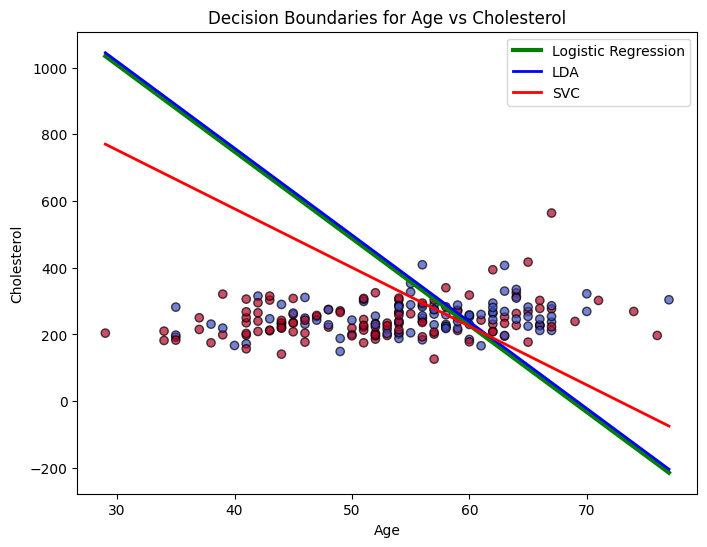

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#base scatter
plt.figure(figsize=(8, 6))
plt.scatter(heart["age"], heart["chol"],
            c=heart["target"], cmap="coolwarm",
            edgecolor="k", alpha=0.7)

#choose a simple age range to draw lines over
age_min = heart["age"].min()
age_max = heart["age"].max()
ages_line = np.array([age_min, age_max])

#logistic regression line
b0 = log_reg.intercept_[0]
b1, b2 = log_reg.coef_[0]
chol_log_line = -(b0 + b1 * ages_line) / b2
plt.plot(ages_line, chol_log_line - 10,   # small shift so you can see it!
         color="green", linewidth=3, label="Logistic Regression")

#lda line
lda_w1, lda_w2 = lda.coef_[0]
lda_w0 = lda.intercept_[0]
chol_lda_line = -(lda_w0 + lda_w1 * ages_line) / lda_w2
plt.plot(ages_line, chol_lda_line, color="blue",
         label="LDA", linewidth=2)

#svc line
svc_w1, svc_w2 = svc_model.coef_[0]
svc_w0 = svc_model.intercept_[0]
chol_svc_line = -(svc_w0 + svc_w1 * ages_line) / svc_w2
plt.plot(ages_line, chol_svc_line, color="red",
         label="SVC", linewidth=2)

#axes + labels
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Decision Boundaries for Age vs Cholesterol")
plt.legend()
plt.show()
